In [13]:
#recode dependent variable to 0, 1
import pandas as pd

data = pd.read_excel("PATH")
print(data['Gi_Bin'].unique()) #to identify unique Gi_Bin values
# to recode Gi_Bin to 0, 1 variable:
for index, row in data.iterrows():
    if data.loc[index, 'Gi_Bin'] in (1,2,3):
        data.loc[index, 'hotspt'] = 1 #add new column
    else:
        data.loc[index, 'hotspt'] = 0 

print(data['hotspt'])

# Save the result to a new Excel file
# be cautious because this will over-write your file 
#data.to_excel("PATH TO FILE", index=False) #add 'hotspt' to data in excel


[-1  0  1  2]
0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    1
8    0
9    1
Name: hotspt, dtype: int64


In [3]:
#to read file just saved, can omit because Python saved "data" for us
data = pd.read_excel("PATH")
print(data.columns)

Index(['lon', 'lat', 'ndvi_act', 'ndwi_act', 'savi_act', 'humid_A', 'humid_D',
       'humid_act', 'wind_act', 'rain_act', 'CH4_D', 'CH4_A', 'CH4',
       'lulc_act', 'GiZScore', 'GiPValue', 'NNeighbors', 'Gi_Bin', 'hotspt',
       'lulclaact_6', 'lulclaact_7', 'lulclaact_8', 'lulclaact_10'],
      dtype='object')


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta]


Output()

Sampling 4 chains for 4_000 tune and 8_000 draw iterations (16_000 + 32_000 draws total) took 10 seconds.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept -6.662  8.666 -23.127    9.221      0.134    0.095    4209.0   
beta       1.091  1.651  -1.926    4.252      0.026    0.018    4183.0   

           ess_tail  r_hat  
intercept    4842.0    1.0  
beta         4844.0    1.0  


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

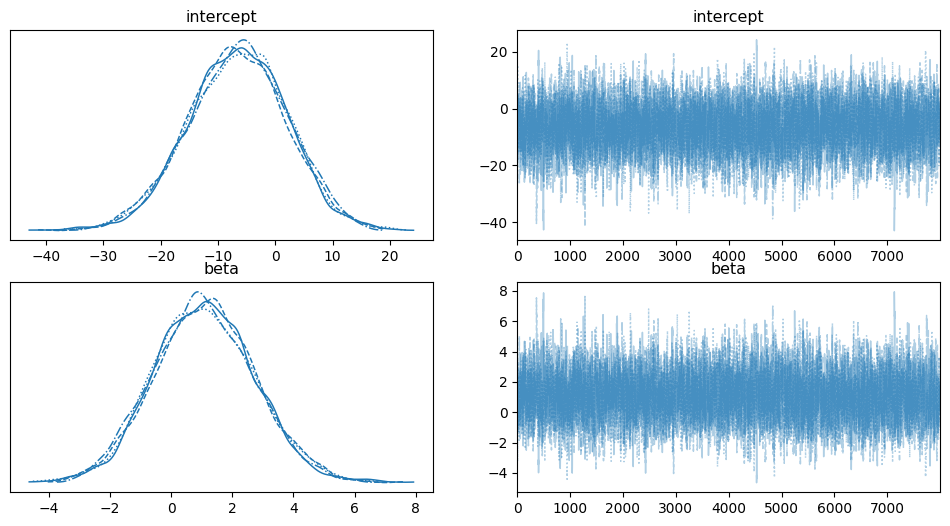

In [5]:
#Bayesian logistic
#humid_act	wind_act rain_act ndvi_act	ndwi_act savi_act lulclaact_6	lulclaact_7	lulclaact_8 lulclaact_10
#LULC categories: lulclaact_6: Forest; lulclaact_7: Grassland; lulclaact_8:Annual Agriculture; lulclaact_10: Shrublands
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

# Load the data from an Excel file
data = pd.read_excel("PATH")

# Extract dependent and independent variables
X = data['wind_act']
y=data['hotspt']
with pm.Model() as logistic_model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)

    # Linear combination
    eta = intercept + beta * X

    # Likelihood
    #The line p = pm.math.invlogit(eta) transforms the linear predictor eta into a probability p using the inverse logit function
    p = pm.math.invlogit(eta)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample using MCMC
    trace = pm.sample(draws=8000,
            tune=4000,
            chains=4)

# Print summary statistics of the posterior
print(az.summary(trace))
# Plot posterior distributions
az.plot_trace(trace, figsize=(12,6))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta]


Sampling 4 chains for 4_000 tune and 8_000 draw iterations (16_000 + 32_000 draws total) took 6 seconds.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept  9.474  5.587  -0.971   20.091      0.086    0.063    4272.0   
beta      -0.454  0.241  -0.939   -0.033      0.004    0.003    4275.0   

           ess_tail  r_hat  
intercept    4628.0    1.0  
beta         4691.0    1.0  


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

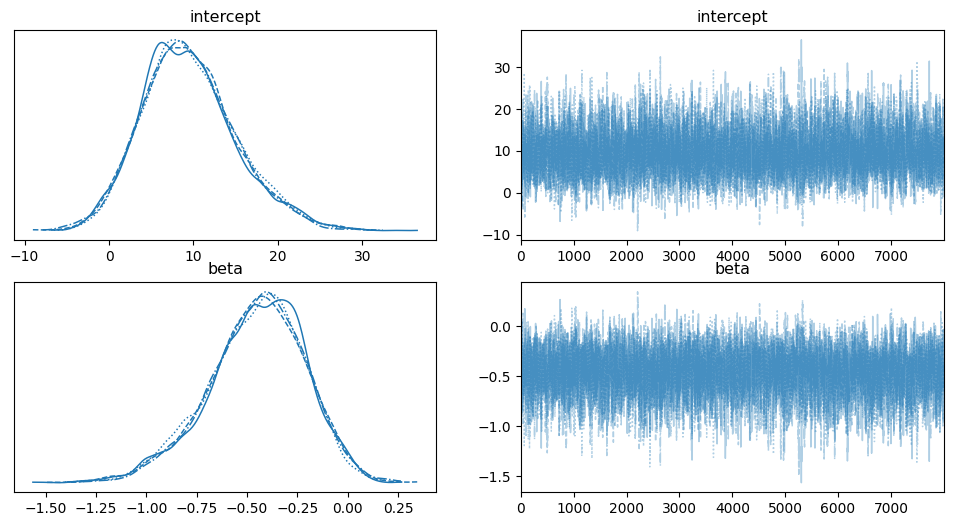

In [41]:
#Bayesian logistic
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
data = pd.read_excel("PATH TO FILE")
# Extract dependent and independent variables
X = data['rain_act']
y=data['hotspt']
with pm.Model() as logistic_model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)

    # Linear combination
    eta = intercept + beta * X

    # Likelihood
    p = pm.math.invlogit(eta)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample using MCMC
    trace = pm.sample(draws=8000,
            tune=4000,
            chains=4)

# Print summary statistics of the posterior
print(az.summary(trace))
# Plot posterior distributions
az.plot_trace(trace, figsize=(12,6))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 4 seconds.


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept  13.208  7.181   0.696   27.086      0.174    0.123    1590.0   
beta       -0.353  0.183  -0.705   -0.035      0.004    0.003    1585.0   

           ess_tail  r_hat  
intercept    1459.0    1.0  
beta         1566.0    1.0  


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

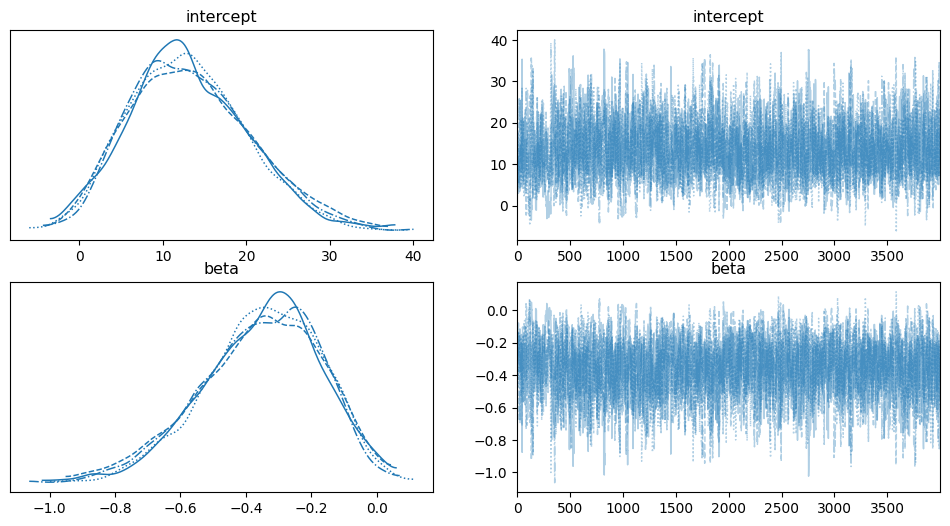

In [43]:
#Bayesian logistic
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

# Extract dependent and independent variables
X = data['humid_act']
y=data['hotspt']
with pm.Model() as logistic_model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)

    # Linear combination
    eta = intercept + beta * X

    # Likelihood
    p = pm.math.invlogit(eta)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample using MCMC
    trace = pm.sample(draws=4000,
            tune=2000,
            chains=4)
# Print summary statistics of the posterior
print(az.summary(trace))
# Plot posterior distributions
az.plot_trace(trace, figsize=(12,6))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 2 seconds.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept -0.097  1.671  -3.239    3.084      0.026    0.020    4185.0   
beta      -5.051  8.677 -21.560   11.470      0.133    0.102    4280.0   

           ess_tail  r_hat  
intercept    4828.0    1.0  
beta         4552.0    1.0  


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

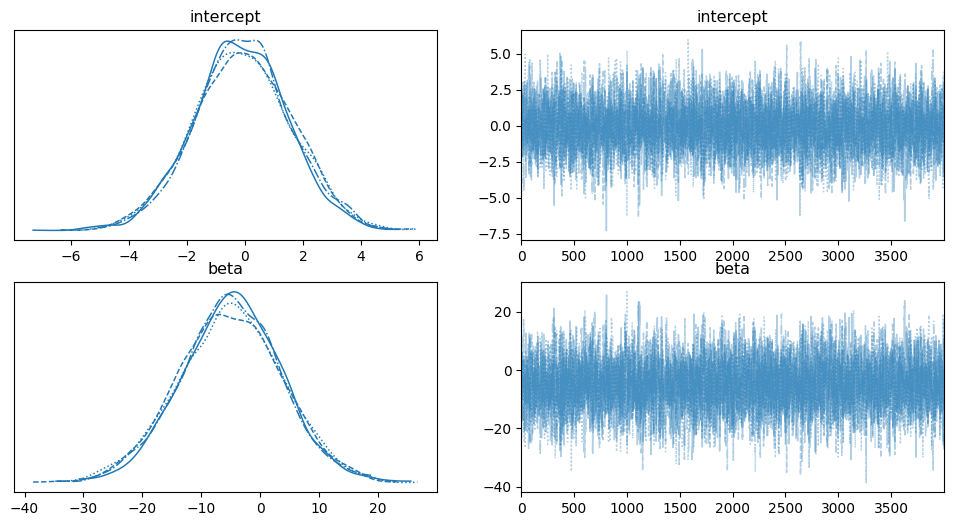

In [44]:
#Bayesian logistic
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

# Extract dependent and independent variables
X = data['ndvi_act']
y=data['hotspt']
with pm.Model() as logistic_model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)

    # Linear combination
    eta = intercept + beta * X

    # Likelihood
    p = pm.math.invlogit(eta)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample using MCMC
    trace = pm.sample(draws=4000,
            tune=2000,
            chains=4)

# Print summary statistics of the posterior
print(az.summary(trace))
# Plot posterior distributions
az.plot_trace(trace, figsize=(12,6))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 2 seconds.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept -1.511  2.210  -5.577    2.714      0.041    0.031    2896.0   
beta      -2.295  8.724 -18.255   14.582      0.162    0.119    2923.0   

           ess_tail  r_hat  
intercept    3164.0    1.0  
beta         3226.0    1.0  


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

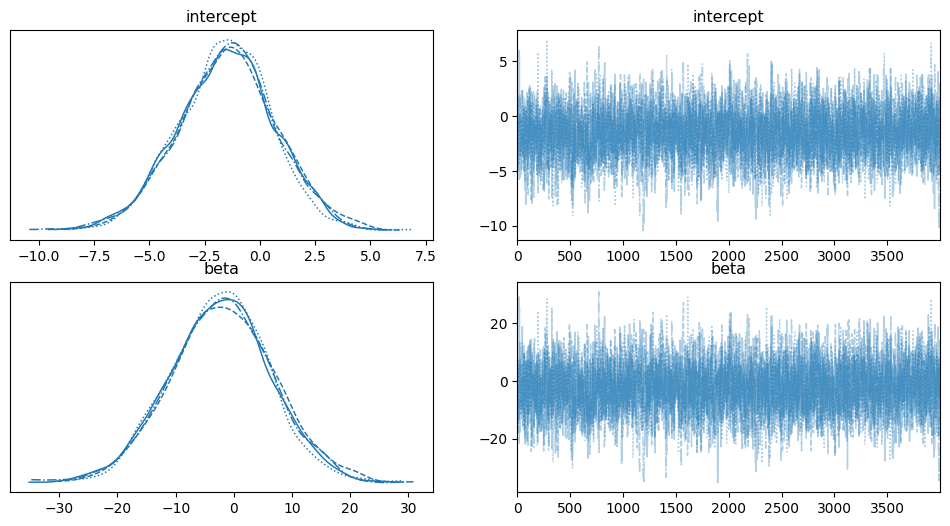

In [46]:
#Bayesian logistic
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

# Extract dependent and independent variables
X = data['ndwi_act']
y=data['hotspt']
with pm.Model() as logistic_model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)

    # Linear combination
    eta = intercept + beta * X

    # Likelihood
    p = pm.math.invlogit(eta)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample using MCMC
    trace = pm.sample(draws=4000,
            tune=2000,
            chains=4)

# Print summary statistics of the posterior
print(az.summary(trace))
# Plot posterior distributions
az.plot_trace(trace, figsize=(12,6))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 2 seconds.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept  0.868  2.039  -2.915    4.708      0.034    0.024    3666.0   
beta      -7.029  7.344 -21.306    6.104      0.119    0.084    3820.0   

           ess_tail  r_hat  
intercept    3961.0    1.0  
beta         4177.0    1.0  


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

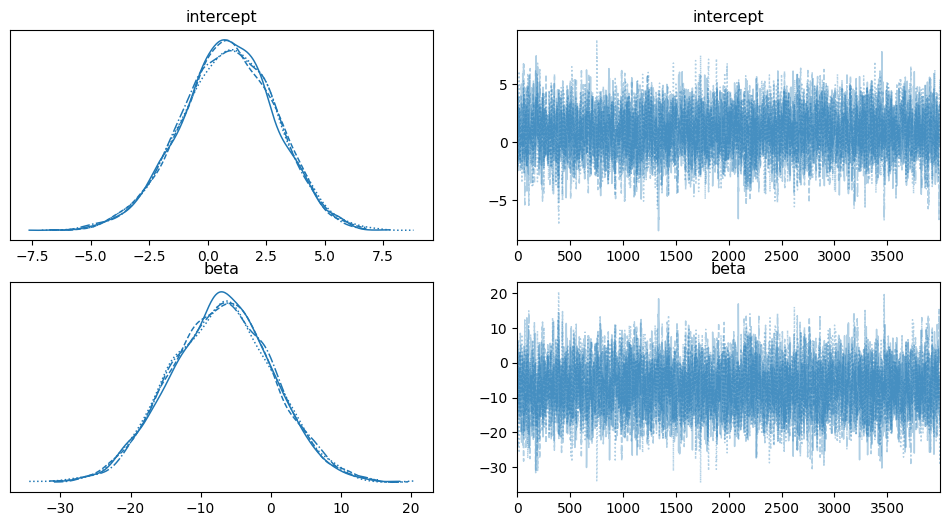

In [47]:
#Bayesian logistic
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

# Extract dependent and independent variables
X = data['savi_act']
y=data['hotspt']
with pm.Model() as logistic_model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)

    # Linear combination
    eta = intercept + beta * X

    # Likelihood
    p = pm.math.invlogit(eta)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample using MCMC
    trace = pm.sample(draws=4000,
            tune=2000,
            chains=4)

# Print summary statistics of the posterior
print(az.summary(trace))
# Plot posterior distributions
az.plot_trace(trace, figsize=(12,6))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta1, beta2, beta4]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 4 seconds.


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept   2.315  2.973  -3.035    8.132      0.044    0.035    5006.0   
beta1      -3.108  3.100  -9.119    2.487      0.045    0.036    4966.0   
beta2      -9.464  6.241 -21.424    1.088      0.088    0.063    5390.0   
beta4     -10.247  6.102 -22.218   -0.158      0.087    0.065    5379.0   

           ess_tail  r_hat  
intercept    4603.0    1.0  
beta1        4713.0    1.0  
beta2        6183.0    1.0  
beta4        5584.0    1.0  


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>],
       [<Axes: title={'center': 'beta4'}>,
        <Axes: title={'center': 'beta4'}>]], dtype=object)

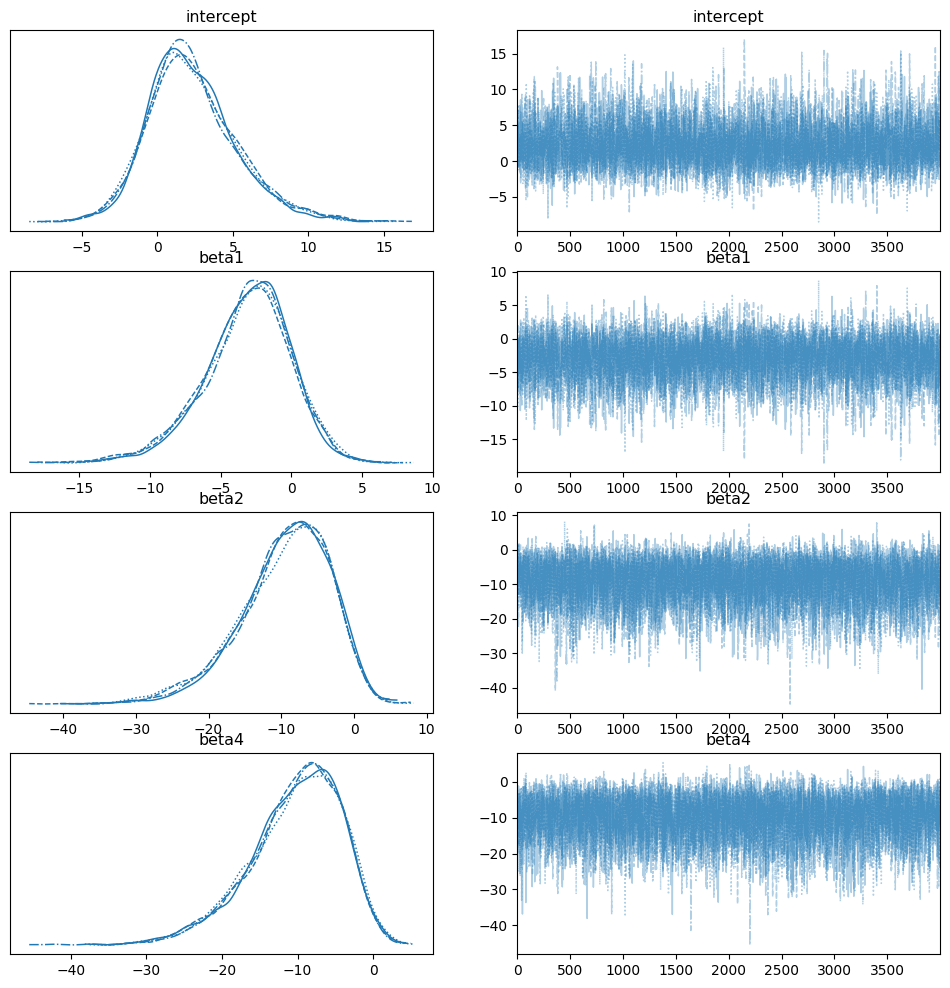

In [5]:
#lulclaact_6: Forest; lulclaact_7: Grassland; lulclaact_8: Annual Agriculture; lulclaact_10: Shrublands
#Bayesian logistic
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
data = pd.read_excel("PATH")

# Extract dependent and independent variables
predictor1 = data['lulclaact_6']
predictor2 = data['lulclaact_7']
predictor3 = data['lulclaact_8']  
predictor4 = data['lulclaact_10'] 

y=data['hotspt']
with pm.Model() as logistic_model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)  # Unique name for predictor 1
    beta2 = pm.Normal('beta2', mu=0, sigma=10)  # Unique name for predictor 2
    #beta3 = pm.Normal('beta3', mu=0, sigma=10)  # Unique name for predictor 3
    beta4 = pm.Normal('beta4', mu=0, sigma=10)  # Unique name for predictor 4
    # Linear combination
    eta = (intercept + beta1 * predictor1+beta2*predictor2+beta4*predictor4 )
    #eta = (intercept +beta1 * predictor1 )
    #eta = (intercept +beta2 * predictor2 )
    #eta = (intercept +beta3 * predictor3 )
    # Likelihood
    p = pm.math.invlogit(eta)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample using MCMC
    trace = pm.sample(draws=4000,
            tune=2000,
            chains=4)
""",
            target_accept=0.99,
            nuts_sampler_kwargs={'max_treedepth': 50}"""
# Print summary statistics of the posterior
print(az.summary(trace))

# Plot posterior distributions
az.plot_trace(trace, figsize=(12,12))

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [intercept]
>BinaryGibbsMetropolis: [beta1, beta2, beta4]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 2 seconds.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept -1.409  0.821   -2.91    0.149      0.011    0.008    5750.0   
beta1      0.528  0.499    0.00    1.000      0.004    0.003   13722.0   
beta2      0.422  0.494    0.00    1.000      0.003    0.002   33258.0   
beta4      0.348  0.476    0.00    1.000      0.003    0.002   23697.0   

           ess_tail  r_hat  
intercept    8557.0    1.0  
beta1       13722.0    1.0  
beta2       16000.0    1.0  
beta4       16000.0    1.0  


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>],
       [<Axes: title={'center': 'beta4'}>,
        <Axes: title={'center': 'beta4'}>]], dtype=object)

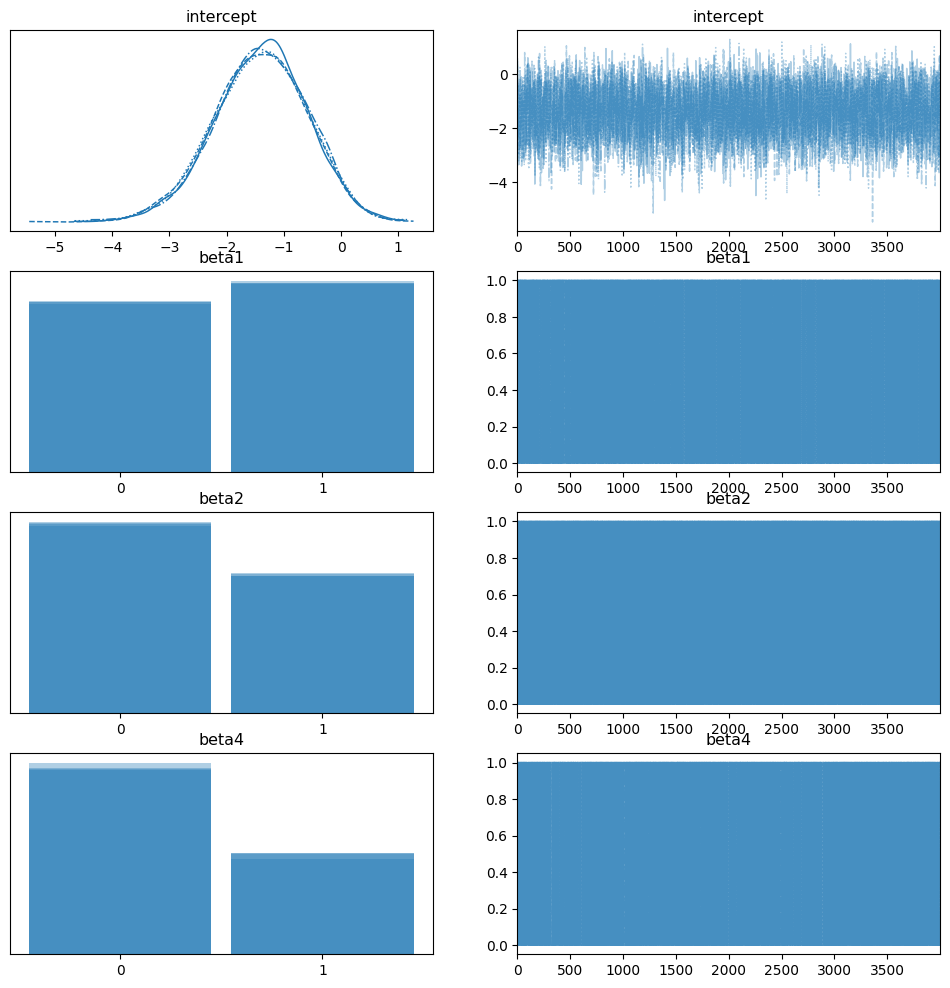

In [6]:
#lulclaact_6: Forest; lulclaact_7: Grassland; lulclaact_8: Annual Agriculture; lulclaact_10: Shrublands
#Bayesian logistic
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
data = pd.read_excel("PATH")

# Extract dependent and independent variables
predictor1 = data['lulclaact_6']
predictor2 = data['lulclaact_7']
predictor3 = data['lulclaact_8']  
predictor4 = data['lulclaact_10'] 

y=data['hotspt']
with pm.Model() as logistic_model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    beta1 = pm.Bernoulli('beta1', p=0.5)  # Unique name for predictor 1
    beta2 = pm.Bernoulli('beta2', p=0.5)  # Unique name for predictor 2
    #beta3 = pm.Bernoulli('beta3', p=0.5)  # Unique name for predictor 3
    beta4 = pm.Bernoulli('beta4', p=0.5)  # Unique name for predictor 4
    # Linear combination
    eta = (intercept + beta1 * predictor1+beta2*predictor2+beta4*predictor4 )
    #eta = (intercept +beta1 * predictor1 )
    #eta = (intercept +beta2 * predictor2 )
    #eta = (intercept +beta3 * predictor3 )
    # Likelihood
    p = pm.math.invlogit(eta)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample using MCMC
    trace = pm.sample(draws=4000,
            tune=2000,
            chains=4)

# Print summary statistics of the posterior
print(az.summary(trace))

# Plot posterior distributions
az.plot_trace(trace, figsize=(12,12))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta3]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept -1.379  0.865  -2.992    0.227      0.016    0.012    3178.0   
beta3      8.707  5.978  -0.616   20.281      0.125    0.093    2555.0   

           ess_tail  r_hat  
intercept    2694.0    1.0  
beta3        2561.0    1.0  


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'beta3'}>,
        <Axes: title={'center': 'beta3'}>]], dtype=object)

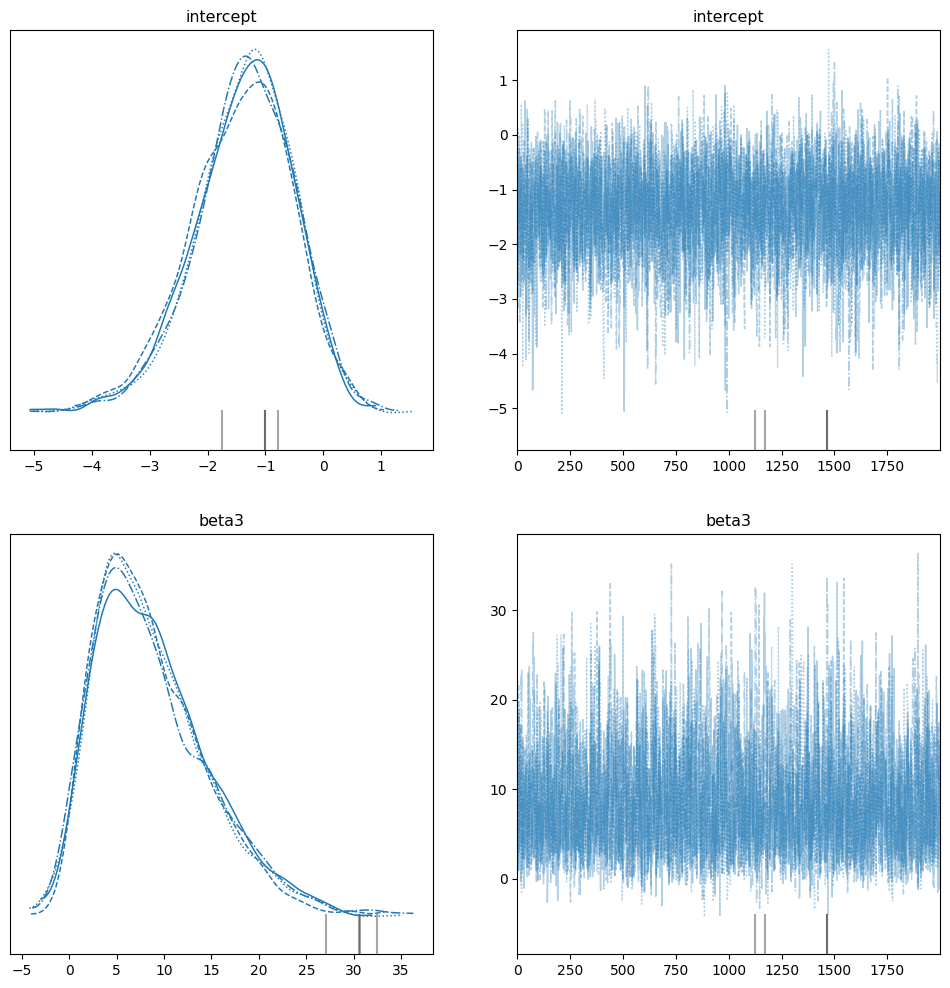

In [71]:
# showing divergence
#lulclaact_6: Forest; lulclaact_7: Grassland; lulclaact_8: Annual Agriculture; lulclaact_10: Shrublands
#Bayesian logistic
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
data = pd.read_excel("PATH")
# Extract dependent and independent variables
predictor1 = data['lulclaact_6']
predictor2 = data['lulclaact_7']
predictor3 = data['lulclaact_8']  
predictor4 = data['lulclaact_10'] 

y=data['hotspt']
with pm.Model() as logistic_model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    #beta1 = pm.Normal('beta1', mu=0, sigma=10)  # Unique name for predictor 1
    #beta2 = pm.Normal('beta2', mu=0, sigma=10)  # Unique name for predictor 2
    beta3 = pm.Normal('beta3', mu=0, sigma=10)  # Unique name for predictor 3
    #beta4 = pm.Normal('beta4', mu=0, sigma=10)  # Unique name for predictor 4
    # Linear combination
    #eta = (intercept + beta1 * predictor1+beta2*predictor2+beta4*predictor4 )
    #eta = (intercept + beta1 * predictor1+beta2*predictor2+beta3*predictor3 )
    #eta = (intercept + beta4 * predictor4+beta2*predictor2+beta3*predictor3 )
    #eta = (intercept +beta1 * predictor1 )
    #eta = (intercept +beta2 * predictor2 )
    eta = (intercept +beta3 * predictor3 )
    # Likelihood
    p = pm.math.invlogit(eta)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Sample using MCMC
    trace = pm.sample(draws=2000,
            tune=1000,
            chains=4,
            target_accept=0.9999999999999999999999999,
            )
    """nuts_sampler_kwargs={'max_treedepth': 10}"""
# Print summary statistics of the posterior
print(az.summary(trace))

# Plot posterior distributions
az.plot_trace(trace, figsize=(12,12))

In [2]:
# check distributions you can use in PYMC
import pymc as pm

# List all attributes in the pm module
all_attributes = dir(pm)

# Filter out the distributions by checking if they are subclasses of pm.Distribution
distributions = [attr for attr in all_attributes if isinstance(getattr(pm, attr), type) and issubclass(getattr(pm, attr), pm.Distribution)]

# Print the distributions
for dist in distributions:
    print(dist)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


AR
AsymmetricLaplace
Bernoulli
Beta
BetaBinomial
Binomial
CAR
Categorical
Cauchy
Censored
Continuous
DiracDelta
Dirichlet
DirichletMultinomial
Discrete
DiscreteUniform
DiscreteWeibull
Distribution
EulerMaruyama
ExGaussian
Exponential
Flat
GARCH11
Gamma
Geometric
Gumbel
HalfCauchy
HalfFlat
HalfNormal
HalfStudentT
HyperGeometric
ICAR
Interpolated
InverseGamma
KroneckerNormal
Kumaraswamy
Laplace
LogNormal
Logistic
LogitNormal
Lognormal
MatrixNormal
Mixture
Moyal
Multinomial
MvNormal
MvStudentT
NegativeBinomial
Normal
Pareto
Poisson
PolyaGamma
RandomWalk
Rice
Simulator
SkewNormal
SkewStudentT
StickBreakingWeights
StudentT
Triangular
Truncated
TruncatedNormal
Uniform
VonMises
Wald
Weibull
Wishart
ZeroSumNormal
